# Shapefiles

Last week, we discussed shape files and where to get them from a few government sources, including data.gov and the Untied States Census. 

We simulated a shapefile, by plotting individual lines in the shape of a single zip code.  Let's dig a little deeper.

**Shapefiles** store the ***geometry*** data type.  Just like a string, integer, or float, a geometry is another data type.

### Point
A **Point** is an individual Latitude and Longitude pair, which is what we used for each zip code on v1 of our bubble map using `folium.CircleMarker`.

### Line
A collection of Latitude and Longitude pairs, form a **Line**, which is how we constructed a line from Park LaBrea to the school using `folium.PolyLine`.

### Polygon 
A collection of Latitude and Longitude pairs, where the last pair is the same as the first pair, is a **Polygon**.  We did this with a line surrounding the zip code 90036. 

---

### Shapefiles on you computer
When you download a shape file from a website, or government data source, it usually comes with three or more files in a zipped folder.  In the case of the data there were 6 files.  Let's take a look inside 'cb_2017_us_zcta510_500k’ in our data folder , which I downloaded from the US census.

First, we will need the OS module, where we can list the contents of our directory with the `listdir()` method.

In [3]:
import os
os.listdir('data/cb_2017_us_zcta510_500k')

['cb_2017_us_zcta510_500k.cpg',
 'cb_2017_us_zcta510_500k.dbf',
 'cb_2017_us_zcta510_500k.prj',
 'cb_2017_us_zcta510_500k.shp',
 'cb_2017_us_zcta510_500k.shp.ea.iso.xml',
 'cb_2017_us_zcta510_500k.shp.iso.xml',
 'cb_2017_us_zcta510_500k.shp.xml',
 'cb_2017_us_zcta510_500k.shx']

### We see a list of all the items from the extracted census zip code zip file.
An important thing to understand about a shapefile, is it requires some of the other files, though we will only be importing the `.shp` file, behind the scenes it will link to and import data from some of the others, in particular the `.dbf` which is the database where all the polygon info, that we need, is actually stored.

### Here are the details of the essential files:
    .shp (contains the geometry)
    .dbf (holds attributes for each geometry)
    .shx (links the attributes to the geometry)
    
---

### Pandas & GeoPandas

I keep bringing up pandas, which we have touched on in the previous meetings, and once again, like I did with pandas, I will just skim the surface of Geopandas.  Geopandas has available all the functions, methods and attributes of pandas with additional functions, methods and attributes, which allow for manipulation shapefiles.

Since we will be using both pandas and geopandas we will need to import them both.  As we `import pandas as pd`, we will need to`import geopandas as gpd`.

In [6]:
import pandas as pd
import geopandas as gpd

### Importing the Shapefile

As we used the `pd.read_csv()` to import the csv file of zip codes, we will use the `gpd.read_file()` to import the `.shp` file, which is in the folder 'cb_2017_us_zcta510_500k' which is inside the 'data' folder or directory.  

As a side note regarding vernacular, we call the pandas objects *DataFrames*, and  we call geopandas *GeoDataFrames*.  So we will use the the shorthand geo_df as our variable for our GeoDataFrame, though like any variable, we could name it almost anything we like.

In [7]:
geo_df = gpd.read_file('data/cb_2017_us_zcta510_500k/cb_2017_us_zcta510_500k.shp') 
geo_df.set_index("ZCTA5CE10", inplace=True)
geo_df.head()

,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
ZCTA5CE10,,,,,
35442,8600000US35442,35442,610213891,10838694,"(POLYGON ((-88.252618 32.92675, -88.249724 32...."
85365,8600000US85365,85365,3545016067,9766486,"(POLYGON ((-114.684663 32.687389, -114.676063 ..."
71973,8600000US71973,71973,204670474,1264709,"POLYGON ((-94.46643176650841 34.330735, -94.46..."
95445,8600000US95445,95445,221559097,7363179,"POLYGON ((-123.643051 38.851233, -123.641401 3..."
06870,8600000US06870,06870,5945321,3841130,"POLYGON ((-73.58765810889219 41.0076522198727,..."


#### Notice A Cool Thing Jupyter Notebooks?
Jupyter Notebooks will display a named variable, without the need for a print statement: <code>geo_df.head()</code>

In the above cell the line <code>geo_df.head()</code> did not require <code>print(geo_df.head())</code> to see the printed head from the DataFrame. I would even say it looks a lot nicer than the python print function:

In [8]:
print(geo_df.head())

               AFFGEOID10 GEOID10     ALAND10  AWATER10  \
ZCTA5CE10                                                 
35442      8600000US35442   35442   610213891  10838694   
85365      8600000US85365   85365  3545016067   9766486   
71973      8600000US71973   71973   204670474   1264709   
95445      8600000US95445   95445   221559097   7363179   
06870      8600000US06870   06870     5945321   3841130   

                                                    geometry  
ZCTA5CE10                                                     
35442      (POLYGON ((-88.252618 32.92675, -88.249724 32....  
85365      (POLYGON ((-114.684663 32.687389, -114.676063 ...  
71973      POLYGON ((-94.46643176650841 34.330735, -94.46...  
95445      POLYGON ((-123.643051 38.851233, -123.641401 3...  
06870      POLYGON ((-73.58765810889219 41.0076522198727,...  


#### Yes, things look nicer with GeoPandas Too!
To see the output for the selection of the <code>geometry</code>, for the zip code 90036, we can run the following cell, without a print statement.

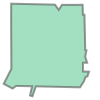

In [9]:
geo_df.loc['90036']['geometry']

We also like the python <code>print()</code> function, as we can see all the data:

In [10]:
print(geo_df.loc['90036']['geometry'])

POLYGON ((-118.361375 34.062967, -118.361452 34.080191, -118.361417 34.083811, -118.347435 34.083505, -118.346216 34.081852, -118.345149 34.083455, -118.34405 34.083431, -118.338583 34.083457, -118.338496 34.080292, -118.337995 34.08029399999999, -118.337734 34.068981, -118.337348 34.068911, -118.337763 34.066905, -118.337149 34.064928, -118.338469 34.064925, -118.338464 34.062115, -118.336545 34.062077, -118.337054 34.060564, -118.337616 34.060423, -118.338167 34.058981, -118.339393 34.057063, -118.353539 34.057385, -118.354642 34.054199, -118.355409 34.054467, -118.354739 34.05741, -118.359856 34.057519, -118.360966 34.056668, -118.363818 34.058183, -118.361375 34.062967))


Let's scroll up and look at the shapefile head again

Do you seen how the first line in the geometry column starts with <code>(POLYGON ((...</code> vs the next line? <code>POLYGON ((...</code> which does not start with a leading parenthese.

What shape do you think this will print?:

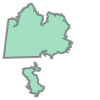

In [11]:
geo_df.loc['35442']['geometry']

### MULTIPOLYGON
It is a multi-polygon, which is constructed like a tuple*, of two or more polygons.  Take a look at what we get when we print, using the print statement, how the <code>(POLYGON</code> is displayed. 

In [14]:
print(geo_df.loc['35442']['geometry'])

MULTIPOLYGON (((-88.252618 32.92675, -88.249724 32.93242, -88.24927699999999 32.935445, -88.25165799999999 32.939562, -88.244438 32.942835, -88.241524 32.943475, -88.223208 32.943914, -88.22080099999999 32.943674, -88.21701 32.942106, -88.219386 32.944436, -88.21664899999999 32.946624, -88.216779 32.947814, -88.213938 32.949691, -88.212525 32.947789, -88.20961699999999 32.947812, -88.209345 32.945889, -88.20787799999999 32.946485, -88.206734 32.944995, -88.20435999999999 32.946112, -88.203648 32.947345, -88.20190000000001 32.945577, -88.20209199999999 32.938989, -88.20064499999999 32.938453, -88.198272 32.941612, -88.197619 32.944076, -88.197609 32.953398, -88.19705399999999 32.956958, -88.19703899999999 32.960555, -88.19812899999999 32.966284, -88.19906499999999 32.969088, -88.19828199999999 32.968936, -88.196703 32.967236, -88.19458299999999 32.967689, -88.19275999999999 32.96542, -88.18839799999999 32.961354, -88.189757 32.959086, -88.18948499999999 32.95597, -88.18731 32.951251, -8

## Interesting!
If you dig through the Multi-Polygon Data you will find the break point between the two Polygons:<br><code>-88.252618 32.92675)), ((-88.34043199999999 32.991199</code>



\* NOTE: I said like a tuple because a geometry object is it’s own datatype, and though it’s internal working may use tuples

---

# Qualitative vs Quantitative

Qualitative data visualizations are used to communicate non-numeric information, that doesn't involve measurements or quantities. There many varieties of Qualitative visualizations, such as word clouds, timelines, and illustrative diagrams. 

We have numeric information, numbers of students in zip codes.  So we are doing a Quantitative visualization, including our original bubble map. 

## Choropleth
Though we are 100% in the Quantitative space, there is something about the plotting the data on a Choropleth map that gives the feel of a more Qualitative presentation. Here are two examples:

<img src="images/GALA_13_image_01.png" alt=""/>
<img src="images/GALA_13_image_02.png" alt=""/>
